In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import json
import re

In [2]:
claim_denied = pd.read_csv('claim_denied.txt',header = None, sep='-')
claim_denied.columns = ['case','platform','tag','other']
claim_denied['timeStamp'] = claim_denied.other.map(lambda x: float(x.split(',')[-1]))
claim_denied['customer_id'] = claim_denied.tag.map(lambda x: x.split(':')[-1].strip())
claim_denied.tag =  "Claim_Deined"
del claim_denied['other']
claim_denied.head()

,case,platform,tag,timeStamp,customer_id
0,e6cd8ce31a1d4d6,mobile_browser,Claim_Deined,1.483203e+09,99ccf1
1,e67b69c9b4554c0,pc_browser,Claim_Deined,1.483204e+09,b7aab4
2,58891c5466d240b,pc_browser,Claim_Deined,1.483211e+09,2bc68b
3,94270be3a7f440a,mobile_browser,Claim_Deined,1.483218e+09,48802d
4,a699b8150503414,pc_browser,Claim_Deined,1.483223e+09,3b8ce8


In [67]:
# claim_accepted.groupby("customer_id").count().sort_values(by="tag")
# del claim_accepted['money']

In [4]:
payment_completed = pd.read_csv("payment_completed_basic.txt",
                             header = None,
                             names = ['case' ,'platform', 'customer_id', 'timeStamp'])
payment_completed['tag'] = "Payment_Completed"

In [55]:
claim_accepted = pd.read_csv("claim_accepted_basic.txt",
                             header = None,
                             names = ['case', 'paid_amount' ,'platform', 
                                      'customer_id', 'timeStamp'])
claim_accepted['tag'] = "Claim_Accepted"
claim_accepted.head()

,case,paid_amount,platform,customer_id,money,timeStamp,tag
0,ea0f160a58c3496,19720.15,pc_browser,9bae09,19720.15,1.483211e+09,Claim_Accepted
1,3be3afe8a7b04c5,13928.65,pc_browser,3d476d,13928.65,1.483228e+09,Claim_Accepted
2,68ad8febf880477,15241.79,mobile_browser,dbbf0f,15241.79,1.483304e+09,Claim_Accepted
3,e646f20fe849498,13331.07,mobile_app,c1b810,13331.07,1.483381e+09,Claim_Accepted
4,6860630a3310419,14458.90,mobile_app,af1eee,14458.90,1.483406e+09,Claim_Accepted


In [69]:
quote_completed[quote_completed.customer_id=="a49ce0"]

,case,name,email,gender,age,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform,customer_id,street,suburb,timeStamp,tag
41599,0cbc17b34637494,Molly Lee,Molly Lee@yahoo.com,female,29,1,310.580007,2,1,"[{'name': 'Randy Lee', 'age': 30, 'gender': 'm...",mobile_app,a49ce0,21 North David,Walters Meadows Apt.,1.488313e+09,Quote_Completed
92016,9e2b4c0ea9604f4,Danielle Anderson,Danielle Anderson@cameron.biz,female,37,0,355.669668,4,1,"[{'name': 'Renee Anderson', 'age': 36, 'gender...",mobile_app,a49ce0,54 Lindaburgh,PSC,1.494429e+09,Quote_Completed


In [68]:
claim_accepted[claim_accepted.customer_id=="a49ce0"]

,case,paid_amount,platform,customer_id,timeStamp,tag
40085,0f0f08bb2fff40c,8764.50,mobile_app,a49ce0,1.494809e+09,Claim_Accepted
44660,ddd6614de69c40a,8764.50,mobile_app,a49ce0,1.495417e+09,Claim_Accepted
50991,1ed11f490279464,10391.74,mobile_app,a49ce0,1.496204e+09,Claim_Accepted
61048,80c26f6f394c42b,8764.50,mobile_app,a49ce0,1.497426e+09,Claim_Accepted
64603,1bc5ddf89c1a413,8764.50,mobile_app,a49ce0,1.497819e+09,Claim_Accepted
68078,7e0b764304fe4e6,8764.50,mobile_app,a49ce0,1.498202e+09,Claim_Accepted
68144,0d16a1b2bfd0468,10391.74,mobile_app,a49ce0,1.498209e+09,Claim_Accepted
72911,5bfb2382414a40d,8764.50,mobile_app,a49ce0,1.498716e+09,Claim_Accepted
104555,f12216c5b08a42a,10391.74,mobile_app,a49ce0,1.501832e+09,Claim_Accepted
123448,ec9212953425465,10391.74,mobile_app,a49ce0,1.503519e+09,Claim_Accepted


In [71]:
# len(claim_accepted.customer_id.unique().tolist())
claim_accepted.paid_amount.describe()

count    816301.000000
mean       8710.884243
std        2115.331869
min        2642.610000
25%        7327.870000
50%        8626.900000
75%        9955.940000
max       27097.440000
Name: paid_amount, dtype: float64

4480.884243

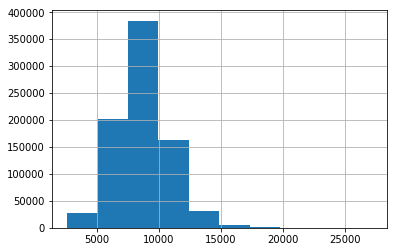

In [74]:
claim_accepted.paid_amount.hist()
8710.8842430-2*2115

In [6]:
quote_completed = pd.read_csv('quote_completed_json.txt',
                  sep = '~',
                  header = None,
                  names = ['case','payload'])
quote_completed.head()

,case,payload
0,1368d40a4f6e455,"{""name"": ""Nicole Berry"", ""email"": ""Nicole Berr..."
1,6859e40fdc3f40d,"{""name"": ""Brandi Harris"", ""email"": ""Brandi Har..."
2,be4398c940284fe,"{""name"": ""Christopher Moody"", ""email"": ""Christ..."
3,0baaef67fe8a458,"{""name"": ""Loretta Steele"", ""email"": ""Loretta S..."
4,8fd309fecc6d43a,"{""name"": ""Shawn Cruz"", ""email"": ""Shawn Cruz@hi..."


In [7]:
quote_completed['name'] = quote_completed.payload.map(lambda x: json.loads(x)['name'])
quote_completed['email'] = quote_completed.payload.map(lambda x: json.loads(x)['email'])
quote_completed['gender'] = quote_completed.payload.map(lambda x: json.loads(x)['gender'])
quote_completed['age'] = quote_completed.payload.map(lambda x: json.loads(x)['age'])
quote_completed['home'] = quote_completed.payload.map(lambda x: json.loads(x)['home'])

In [8]:
quote_completed['home_type'] = quote_completed.home.map(lambda x: x['type'])
quote_completed['square_footage'] = quote_completed.home.map(lambda x: x['square_footage'])
quote_completed['number_of_bedrooms'] = quote_completed.home.map(lambda x: x['number_of_bedrooms'])
quote_completed['number_of_floors'] = quote_completed.home.map(lambda x: x['number_of_floors'])
quote_completed['household'] = quote_completed.payload.map(lambda x: json.loads(x)['household'])
del quote_completed['payload']
del quote_completed['home']

In [9]:
# tmp is the 
quote_completed_basic = pd.read_csv('quote_completed_basic.txt',
                  header = None,
                  names = ['case','platform','customer_id','street','suburb','timeStamp'])
quote_completed_basic['tag'] = "Quote_Completed"
quote_completed_basic.street = quote_completed_basic.street.map(lambda x:x.strip()) 
quote_completed_basic.suburb = quote_completed_basic.suburb.map(lambda x:x.strip()) 
quote_completed_basic.shape

(523322, 7)

In [10]:
len(quote_completed_basic.suburb.unique().tolist())
# there are only 490 unique suburbs in the data

490

In [11]:
# combine the basic info and the json payload together 
quote_completed = pd.merge(quote_completed, quote_completed_basic, on='case')

In [12]:
quote_completed.head()

,case,name,email,gender,age,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform,customer_id,street,suburb,timeStamp,tag
0,1368d40a4f6e455,Nicole Berry,Nicole Berry@hotmail.com,male,29,1,311.803620,2,1,"[{'name': 'Oscar Berry', 'age': 25, 'gender': ...",mobile_browser,99ccf1,66 Lake Jamieview,PSC,1.483194e+09,Quote_Completed
1,6859e40fdc3f40d,Brandi Harris,Brandi Harris@duncan.com,male,62,1,523.432957,2,1,"[{'name': 'Michael Harris', 'age': 12, 'gender...",pc_browser,9bae09,60 West Lisaside,Jamie Port Suite,1.483197e+09,Quote_Completed
2,be4398c940284fe,Christopher Moody,Christopher Moody@green.info,male,40,1,221.633267,3,1,[],pc_browser,b7aab4,120 Danielmouth,Unit Box,1.483201e+09,Quote_Completed
3,0baaef67fe8a458,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,1,301.854950,3,1,"[{'name': 'Zachary Steele', 'age': 48, 'gender...",pc_browser,2bc68b,73 Edwardfurt,Michelle Crossing Suite,1.483205e+09,Quote_Completed
4,8fd309fecc6d43a,Shawn Cruz,Shawn Cruz@hines-hicks.com,female,33,0,265.802910,1,1,"[{'name': 'Rebecca Cruz', 'age': 13, 'gender':...",phone_call,1c425a,3 Patriciastad,Nguyen Tunnel,1.483208e+09,Quote_Completed


In [13]:
print(quote_completed.shape )
# quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)

(523322, 16)


In [14]:
# Just take a look at the claim_started data set 
claim_started = pd.read_csv('claim_started_basic.txt',
                  header = None,
                  names = ['case','platform','customer_id','timeStamp'])
claim_started['tag'] = "Claim_Started"
claim_started.shape

(826795, 5)

In [99]:
t = claim_started[['customer_id','platform']].drop_duplicates().groupby("customer_id").count()
# t[t.customer_id=='aa159a']
# t.sort_values('platform',ascending=False).
t= pd.merge(t,mixed,'inner',on='customer_id').sort_values('platform')
t[t.platform == 1 ].shape
# .groupby('customer_id').count()

(35, 5)

In [16]:
# find out if there is a payment_completed case at the same timeStamp, for the same customer 
# lable all the claim_started cases this way 
claim_started.iloc[0]

case           90527688b31d445
platform        mobile_browser
customer_id             99ccf1
timeStamp          1.48319e+09
tag              Claim_Started
Name: 0, dtype: object

In [17]:
c0 = claim_started.iloc[0]['customer_id']
t0 = claim_started.iloc[0]['timeStamp']
# based on this timeStamp, we look at the following tables: 
# quote completed, claim denied, claim accepted 
# only look at the data prior to this timeStamp, and 

In [18]:
# quote_completed[ (quote_completed.timeStamp <t0) & (quote_completed.customer_id == c0)] 
# claim_accepted[ (claim_accepted.timeStamp <t0) & (claim_accepted.customer_id == c0)] 
# claim_denied[ (claim_denied.timeStamp <t0) & (claim_denied.customer_id == c0)] 

### this data shows how many times each customer started their claims 

### Let's take a look at how many times they get denied and accepted each. 

In [19]:
tmp = claim_started.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp.columns.tolist()
tmp['Total'] = tmp.case
for item in list_:
    del tmp[item]

In [20]:
# claim_denied dataframe has problem that the customer_id has white spaces 
tmp_denied = claim_denied.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_denied.columns.tolist()
tmp_denied['Denied'] = tmp_denied.case
for item in list_:
    del tmp_denied[item]

In [21]:
tmp_accepted = claim_accepted.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = tmp_accepted.columns.tolist()
tmp_accepted['Accepted'] = tmp_accepted.case
for item in list_:
    del tmp_accepted[item]

In [22]:
tmp.reset_index(level=0, inplace=True)
tmp_denied.reset_index(level=0, inplace=True)
tmp_accepted.reset_index(level=0, inplace=True)

In [23]:
mg_df = pd.merge(tmp, tmp_accepted, how = 'left', on= 'customer_id')
mg_df = pd.merge(mg_df, tmp_denied, how = 'left', on= 'customer_id')

In [24]:
all_accepted = mg_df[(mg_df.Accepted == mg_df.Total)]
all_denied = mg_df[(mg_df.Denied == mg_df.Total)]
mixed = mg_df[(mg_df.Accepted >0) & (mg_df.Denied>0)]

In [77]:
# %matplotlib inline
mixed.head()

,customer_id,Total,Accepted,Denied
682,cac303,31,30.0,1.0
2334,8c8ab4,24,23.0,1.0
3333,aa159a,22,21.0,1.0
3751,46ff05,21,20.0,1.0
5797,85e5c6,18,17.0,1.0


In [26]:
101/claim_started.shape[0]
# 以上奇怪的数据仅占总数的万分之一

0.00012215845523981156

In [27]:
# mg_df[mg_df.Accepted > 0].shape
mg_df[mg_df.Denied == 1].shape

(10488, 4)

In [28]:
denied_started = pd.merge(tmp, tmp_denied, on= 'customer_id')
denied_started[denied_started.Denied > 1 ]

,customer_id,Total,Denied
81,46d885,2,2
93,f7dbe5,2,2
100,9b5212,2,2


In [29]:
count_payload = quote_completed.groupby('customer_id').count().sort_values(by = ['case'],ascending = False)
list_ = count_payload.columns.tolist()
count_payload['num_of_payload'] = count_payload.case
for item in list_:
    del count_payload[item]
more_than_one_payload  = set(count_payload[count_payload.num_of_payload > 1].index.tolist())

In [30]:
# all the mixed customers have more than one payload 
mixed_payload  = set(mg_df.customer_id.tolist())
mixed_payload - more_than_one_payload

{'23d7a9',
 '9196cb',
 '962d45',
 'c0e56b',
 '1cb15b',
 '43c357',
 'ea46f5',
 '55d2ea',
 '916bb4',
 '517b79',
 'd44e80',
 '68bcd9',
 '2062f3',
 '6b0b77',
 '1adb7c',
 'bb1b69',
 'b427a3',
 '2ebbe5',
 'd5e002',
 'fee6e3',
 'c98113',
 '79c705',
 'e01122',
 '367fcc',
 'cd98e5',
 '619e18',
 '3b7954',
 '69ac91',
 '9ecbd8',
 '2470a6',
 '14fcb4',
 'f5992b',
 'b62599',
 '9fdecc',
 'f2a61e',
 'a11c30',
 '25e0a3',
 'c48038',
 'a71464',
 '560969',
 'e3e9ee',
 '2d6c06',
 'eebe0f',
 '31fbc3',
 '5d8cb9',
 'a0250f',
 '6b5345',
 '4d974a',
 'd6db5e',
 'ac7b89',
 '634173',
 '667a6c',
 '366418',
 'befc4d',
 '151e40',
 'edf554',
 '7951b8',
 '9c6038',
 'ff0243',
 'f8aace',
 '5f3f86',
 'a606eb',
 '8a7872',
 '995124',
 '3f790f',
 'dc36a3',
 'd3ab75',
 '5f90fa',
 '470908',
 'cb6dcc',
 'ca9c26',
 '5a7562',
 'ccbec6',
 '1051a5',
 'b7409f',
 '32f45d',
 '730ff5',
 'e98096',
 '28c6af',
 '193ad5',
 'cade63',
 'c30cbe',
 'c055ae',
 '5dc17b',
 '8dd9d3',
 'ff33dc',
 'd01c77',
 '5087da',
 '31e8f2',
 '5ac7c6',
 'e2a8ad',

In [31]:
claim_started.head()

,case,platform,customer_id,timeStamp,tag
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,Claim_Started
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,Claim_Started
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,Claim_Started
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,Claim_Started
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,Claim_Started


In [32]:
# claim_accepted.to_csv("important_data/claim_accepted_cleaned.csv",index= False)
# claim_started.to_csv("important_data/claim_started_cleaned.csv",index= False)
# claim_denied.to_csv("important_data/claim_denied_cleaned.csv",index= False)
# mg_df.to_csv( "important_data/mixed.csv", index = False)

In [33]:
incoming_case = pd.merge(claim_started,payment_completed, how = "left", on  = ['timeStamp','customer_id'])
incoming_case.case_y = incoming_case.case_y.notnull().astype('int')
del incoming_case['platform_y']
del incoming_case['tag_y']
del incoming_case['tag_x']
# matched_payment_compelte indicate whether the claim_started is matched with a payment completed case
incoming_case.columns = ['case','platform','customer_id','timeStamp','matched_payment_complete']


incoming_case = pd.merge(incoming_case , all_accepted, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_accepted'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
incoming_case.all_accepted = incoming_case.all_accepted.map({1:-1,0:0})

incoming_case = pd.merge(incoming_case , all_denied, how = 'left', on =['customer_id'])
incoming_case.Total = incoming_case.Total.notnull().astype('int')
incoming_case.rename(columns={'Total':'all_denied'}, inplace=True)
del incoming_case['Accepted']
del incoming_case['Denied']
# incoming_case.all_denied = incoming_case.all_denied.map({1:-1,0:0})

incoming_case['label'] = incoming_case.all_accepted + incoming_case.all_denied
del incoming_case['all_denied']
del incoming_case['all_accepted']
incoming_case.head()

,case,platform,customer_id,timeStamp,matched_payment_complete,label
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,-1
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,0,-1
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1


In [34]:
# the label of 1 indicate fraud, -1 indicate not fraud, 0 indicate no entry for now 
# incoming_case[(incoming_case.label == 0)  ].groupby('customer_id').count()
mixed[mixed.Denied ==  1].shape # there are all denied once 

(101, 4)

In [35]:
# for the mixed customers, we find out which cases are denied, find the case_id 
# label all these positives, then label all 0 to be negatives 
mixed_claims = pd.merge(claim_denied , mixed , on = ['customer_id'])
test = pd.merge(mixed_claims, claim_started, how = "outer", on = ['customer_id'])

## something wrong right here
# test[test.timeStamp_x > test.timeStamp_y].groupby("customer_id")[['timeStamp_y']].max()
id_time = test[test.timeStamp_x > test.timeStamp_y].groupby("customer_id")[['timeStamp_y']].max()

test_ = pd.merge(id_time, test, how = "left", on = ['timeStamp_y'])[['case_y','timeStamp_y','customer_id']]
# merge with claim started, on customer_id, and left.time > right.time


In [36]:
mixed_denied = test_[ ['case_y', 'timeStamp_y'] ]

In [37]:
mixed_denied.columns = ['case','timeStarted']

In [38]:
# incoming_case.head()
mixed_denied.head()

,case,timeStarted
0,610936390c6c482,1.520961e+09
1,4bad7df3dfa04e9,1.483467e+09
2,0560cabfca294b5,1.525104e+09
3,c4e4cd69b30a424,1.531419e+09
4,bbcbaa607bae423,1.488485e+09


In [39]:
incoming_case = pd.merge(incoming_case , mixed_denied , how = 'left', on = 'case')
incoming_case.timeStarted = incoming_case.timeStarted.notnull().astype('int')
incoming_case.label = incoming_case.label + incoming_case.timeStarted
incoming_case.label = incoming_case.label.map({1:1,-1:-1,0:-1})

In [40]:
del incoming_case['timeStarted']

In [41]:
incoming_case.head()

,case,platform,customer_id,timeStamp,matched_payment_complete,label
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,-1
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1
3,84618ef8bc28479,mobile_browser,983092,1.483204e+09,0,-1
4,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1


In [42]:
# incoming_case
# quote_completed #y
# about 80 percent of the matched_payment cases, are frauds 
# wonder what about the rest of them 
merge_df = pd.merge(incoming_case, quote_completed, how = "left", on = ['customer_id'])

# this may cause problems

In [43]:
joined = merge_df[merge_df.timeStamp_x > merge_df.timeStamp_y]
tmp = merge_df[merge_df.timeStamp_x < merge_df.timeStamp_y]

In [44]:
merge_set = set(merge_df.case_x.unique().tolist())
income_set = set(incoming_case.case.unique().tolist())
joined_set = set(joined.case_x.unique().tolist())
tmp_set =  set(tmp.case_x.unique().tolist())

In [45]:
len(tmp_set-joined_set)
# when a customer is able to make a claim before the quote is completed

2791

In [46]:
len(tmp_set & joined_set)

10549

In [47]:
max_time_y = joined.groupby(["customer_id","timeStamp_x"])[["timeStamp_y"]].max()

In [48]:
max_time_y.loc["f7dbe5",]
max_time_y.head()

timeStamp_y
customer_id timeStamp_x               
00003a      1.508806e+09  1.496496e+09
            1.511083e+09  1.496496e+09
            1.511904e+09  1.496496e+09
            1.512548e+09  1.496496e+09
            1.516615e+09  1.496496e+09

In [49]:
final = pd.merge(joined,max_time_y,how="inner",on=['customer_id','timeStamp_x','timeStamp_y'])
final.shape

(824004, 21)

In [50]:
final[final.customer_id =="f7dbe5"]

,case_x,platform_x,customer_id,timeStamp_x,matched_payment_complete,label,case_y,name,email,gender,...,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform_y,street,suburb,timeStamp_y,tag
68831,c64af07d5b1148f,mobile_app,f7dbe5,1.496298e+09,1,1,6dbc5787257148a,Diana Simmons,Diana Simmons@gmail.com,male,...,0,204.336235,2,1,"[{'name': 'Brent Simmons', 'age': 6, 'gender':...",mobile_app,125 Joshuamouth,Ryan Ville,1.496298e+09,Quote_Completed
113945,30753a864a8c41a,mobile_browser,f7dbe5,1.500689e+09,1,1,3dc13896288c472,Kristina Zimmerman,Kristina Zimmerman@williams-holloway.com,male,...,0,125.295337,2,1,"[{'name': 'Robert Zimmerman', 'age': 9, 'gende...",mobile_browser,15 South Michelle,Estrada Shoal,1.500689e+09,Quote_Completed


In [51]:
del final['timeStamp_y']
del final['case_y']
del final['tag']

In [52]:
final = final.sort_values(by ='timeStamp_x' )
final.label = final.label.map({1:1,-1:0})

In [53]:
final.to_csv("final.csv",index= False,header=None)
final.head()

,case_x,platform_x,customer_id,timeStamp_x,matched_payment_complete,label,name,email,gender,age,home_type,square_footage,number_of_bedrooms,number_of_floors,household,platform_y,street,suburb
0,90527688b31d445,mobile_browser,99ccf1,1.483194e+09,1,1,Nicole Berry,Nicole Berry@hotmail.com,male,29,1,311.803620,2,1,"[{'name': 'Oscar Berry', 'age': 25, 'gender': ...",mobile_browser,66 Lake Jamieview,PSC
1,4c9ab2942b484f2,pc_browser,9bae09,1.483197e+09,1,0,Brandi Harris,Brandi Harris@duncan.com,male,62,1,523.432957,2,1,"[{'name': 'Michael Harris', 'age': 12, 'gender...",pc_browser,60 West Lisaside,Jamie Port Suite
2,cf1d5d9af6d54ef,pc_browser,b7aab4,1.483201e+09,1,1,Christopher Moody,Christopher Moody@green.info,male,40,1,221.633267,3,1,[],pc_browser,120 Danielmouth,Unit Box
3,ae3f3d4c667a455,pc_browser,2bc68b,1.483205e+09,1,1,Loretta Steele,Loretta Steele@patton-smith.biz,female,48,1,301.854950,3,1,"[{'name': 'Zachary Steele', 'age': 48, 'gender...",pc_browser,73 Edwardfurt,Michelle Crossing Suite
4,5f4bd7c6884b4d1,mobile_browser,48802d,1.483211e+09,1,1,Taylor Ortiz,Taylor Ortiz@reyes.com,male,28,1,282.311278,2,1,"[{'name': 'Stephen Ortiz', 'age': 25, 'gender'...",mobile_browser,39 Garciahaven,Melissa Roads
